# Lib Imports

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from home-credit-default-risk.data import Data


SyntaxError: invalid syntax (<ipython-input-11-e9b5dd97245c>, line 5)

# CSV File Imports

In [7]:
df_col_descriptions = pd.read_csv("../raw_data/HomeCredit_columns_description.csv")

In [9]:
%%time
df_names_list = ["bureau", "credit_card_balance","POS_CASH_balance","previous_application", "application_train","application_test"]
# Create dict of dfs:
dfs_dict = {}
for name in df_names_list:
    dfs_dict["df_"+name]=pd.read_csv(f"../raw_data/{name}.csv").sort_values(by="SK_ID_CURR", ascending=True).head(10_000)
    
# Add bureau df to dict. Added separately bc SK_ID_CURR is not available.
dfs_dict["df_"+"bureau_balance"]=pd.read_csv("../raw_data/bureau_balance.csv").sort_values(by="SK_ID_BUREAU", ascending=True).head(10_000)
df_names_list.append("bureau_balance")

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [4]:
# df_bureau = pd.read_csv("../raw_data/bureau.csv").sort_values(by="SK_ID_CURR", ascending=True).head(10_000) # 1_716_428 total rows
# df_bureau_balance = pd.read_csv("../raw_data/bureau_balance.csv").sort_values(by="SK_ID_BUREAU", ascending=True).head(10_000) # 27_299_925 total rows
# df_credit_card_balance = pd.read_csv("../raw_data/credit_card_balance.csv").sort_values(by="SK_ID_CURR", ascending=True).head(10_000) # 3_840_312 total rows
# df_POS_CASH_balance = pd.read_csv("../raw_data/POS_CASH_balance.csv").sort_values(by="SK_ID_CURR", ascending=True).head(10_000) # 10_001_358 total rows
# df_previous_application = pd.read_csv("../raw_data/previous_application.csv").sort_values(by="SK_ID_CURR", ascending=True).head(10_000) # 1_670_214 total rows
# df_application_train = pd.read_csv("../raw_data/application_train.csv").sort_values(by="SK_ID_CURR", ascending=True).head(10_000) # 307_511 total rows
# df_application_test = pd.read_csv("../raw_data/application_test.csv").sort_values(by="SK_ID_CURR", ascending=True).head(10_000) # 307_511 total rows


In [7]:
# copy paste code to update dfs and dict:
df_bureau = dfs_dict["df_bureau"]
df_bureau_balance = dfs_dict["df_bureau_balance"]
df_credit_card_balance = dfs_dict["df_credit_card_balance"]
df_POS_CASH_balance = dfs_dict["df_POS_CASH_balance"]
df_previous_application = dfs_dict["df_previous_application"]
df_application_train = dfs_dict["df_application_train"]
df_application_test = dfs_dict["df_application_test"]


## Reduce df Size

In [8]:
df_bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [175]:
for df_key, df in dfs_dict.items():
    df_temp = df.copy()
    # dict -> col_name:col_dtype for float64 to float32 dtypes
    col_dtypes = {col:'float32' for col in df_temp.select_dtypes(include='float64').columns.values}
    # udpate dict -> col_name:col_dtype for int64 to int32 dtypes
    for col in df_temp.select_dtypes(include='int64').columns.values:
        col_dtypes[col] = 'int32'
    df_temp = df_temp.astype(col_dtypes)
    # save df with updated dtypes to dfs dict
    dfs_dict[df_key] = df_temp

df_temp = dfs_dict["df_bureau"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 248487 to 854697
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SK_ID_CURR              10000 non-null  int32  
 1   SK_ID_BUREAU            10000 non-null  int32  
 2   CREDIT_ACTIVE           10000 non-null  object 
 3   CREDIT_CURRENCY         10000 non-null  object 
 4   DAYS_CREDIT             10000 non-null  int32  
 5   CREDIT_DAY_OVERDUE      10000 non-null  int32  
 6   DAYS_CREDIT_ENDDATE     9346 non-null   float32
 7   DAYS_ENDDATE_FACT       6212 non-null   float32
 8   AMT_CREDIT_MAX_OVERDUE  3546 non-null   float32
 9   CNT_CREDIT_PROLONG      10000 non-null  int32  
 10  AMT_CREDIT_SUM          10000 non-null  float32
 11  AMT_CREDIT_SUM_DEBT     8491 non-null   float32
 12  AMT_CREDIT_SUM_LIMIT    6581 non-null   float32
 13  AMT_CREDIT_SUM_OVERDUE  10000 non-null  float32
 14  CREDIT_TYPE             10000 no

In [148]:
df_bureau.select_dtypes(include='int64').astype(dtype='int32').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 248487 to 854697
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   SK_ID_CURR          10000 non-null  int32
 1   SK_ID_BUREAU        10000 non-null  int32
 2   DAYS_CREDIT         10000 non-null  int32
 3   CREDIT_DAY_OVERDUE  10000 non-null  int32
 4   CNT_CREDIT_PROLONG  10000 non-null  int32
 5   DAYS_CREDIT_UPDATE  10000 non-null  int32
dtypes: int32(6)
memory usage: 570.5 KB


# Heatmaps - Missing Data

In [9]:
csvs = ["bureau", "bureau_balance", "credit_card_balance", "POS_CASH_balance", "previous_application", "application_train"]

In [10]:
df_app_train.shape

(10000, 122)

In [11]:
df_app_train.TARGET.value_counts(normalize=True)

0    0.9225
1    0.0775
Name: TARGET, dtype: float64

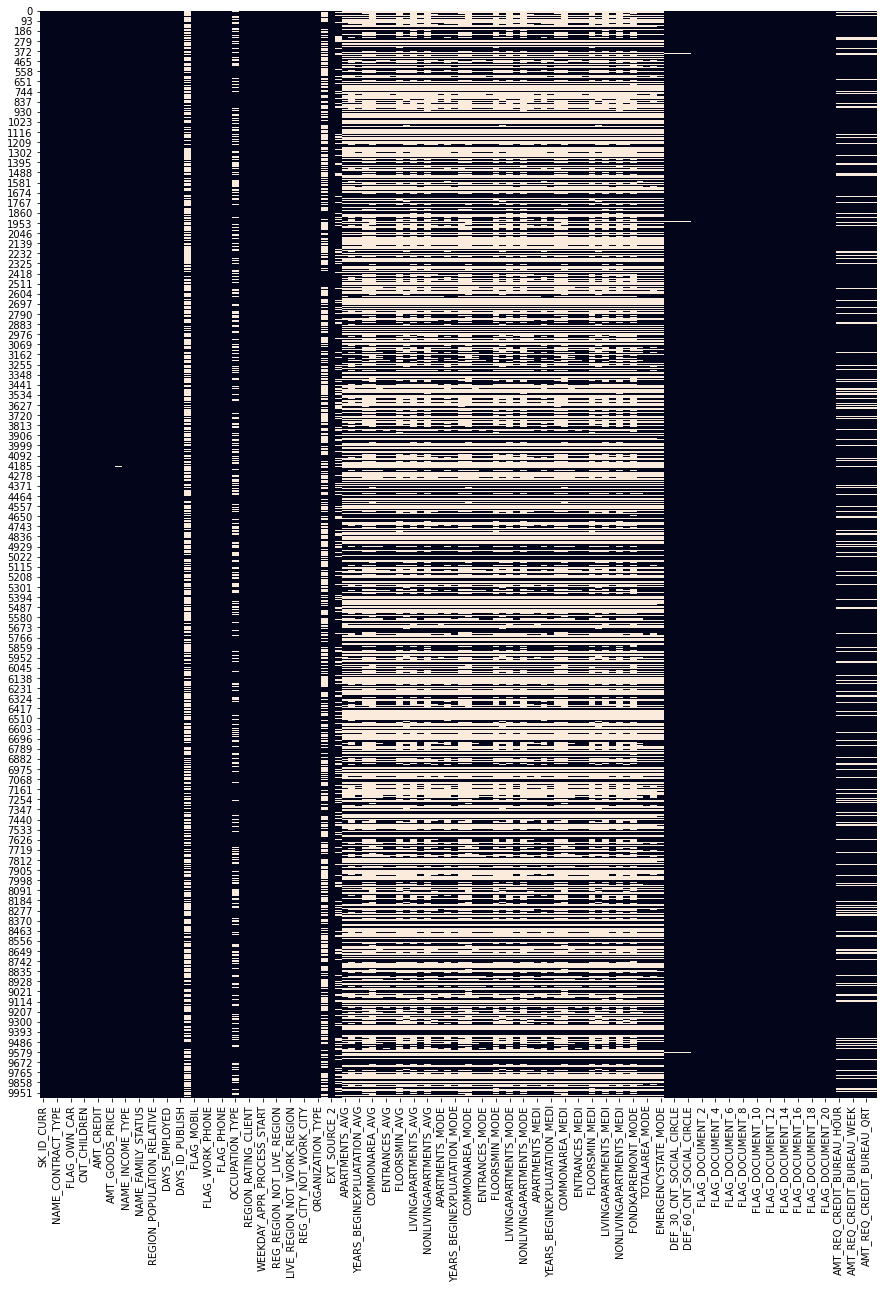

In [12]:
plt.subplots(figsize=(15,20))
sns.heatmap(df_app_train.isnull(),cbar=False);

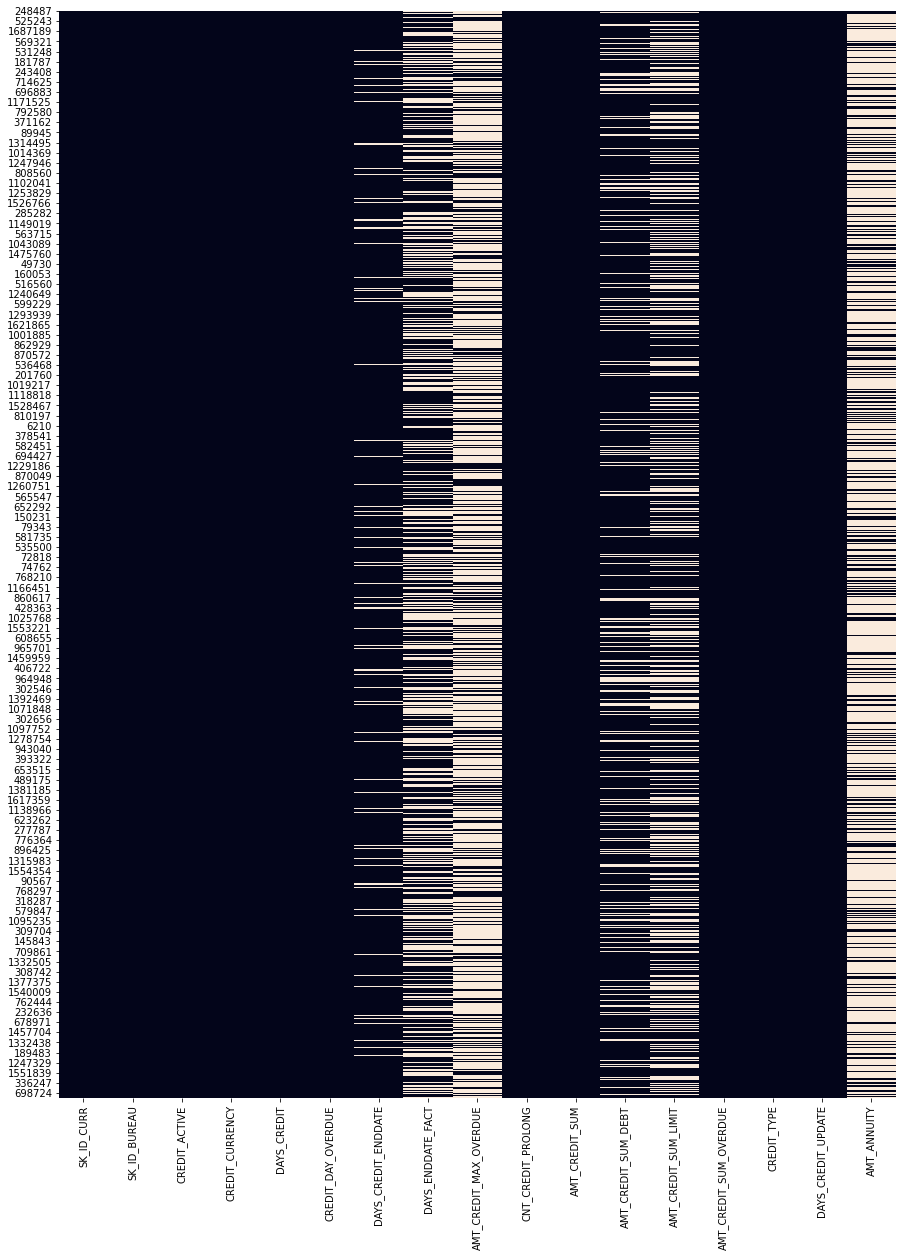

In [13]:
plt.subplots(figsize=(15,20))
sns.heatmap(df_bureau.isnull(),cbar=False);

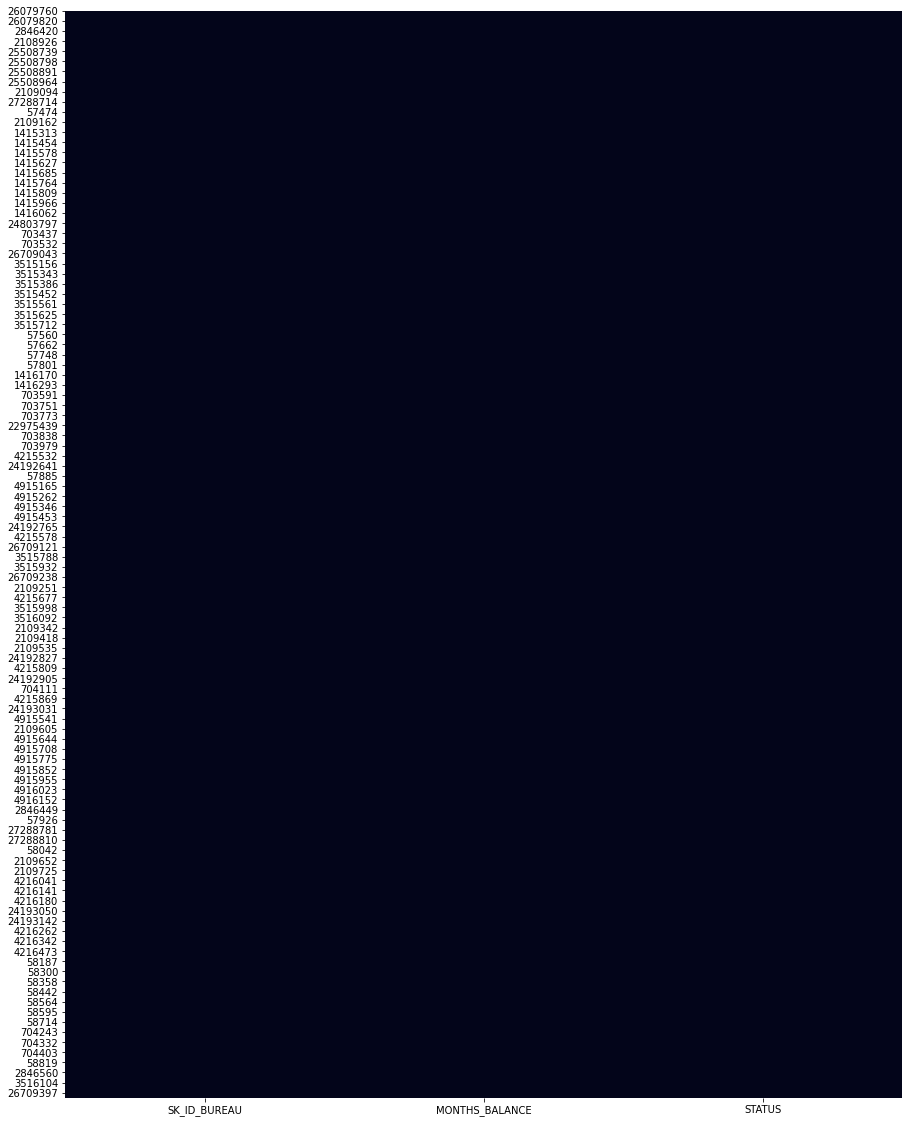

In [14]:
plt.subplots(figsize=(15,20))
sns.heatmap(df_bureau_balance.isnull(),cbar=False);

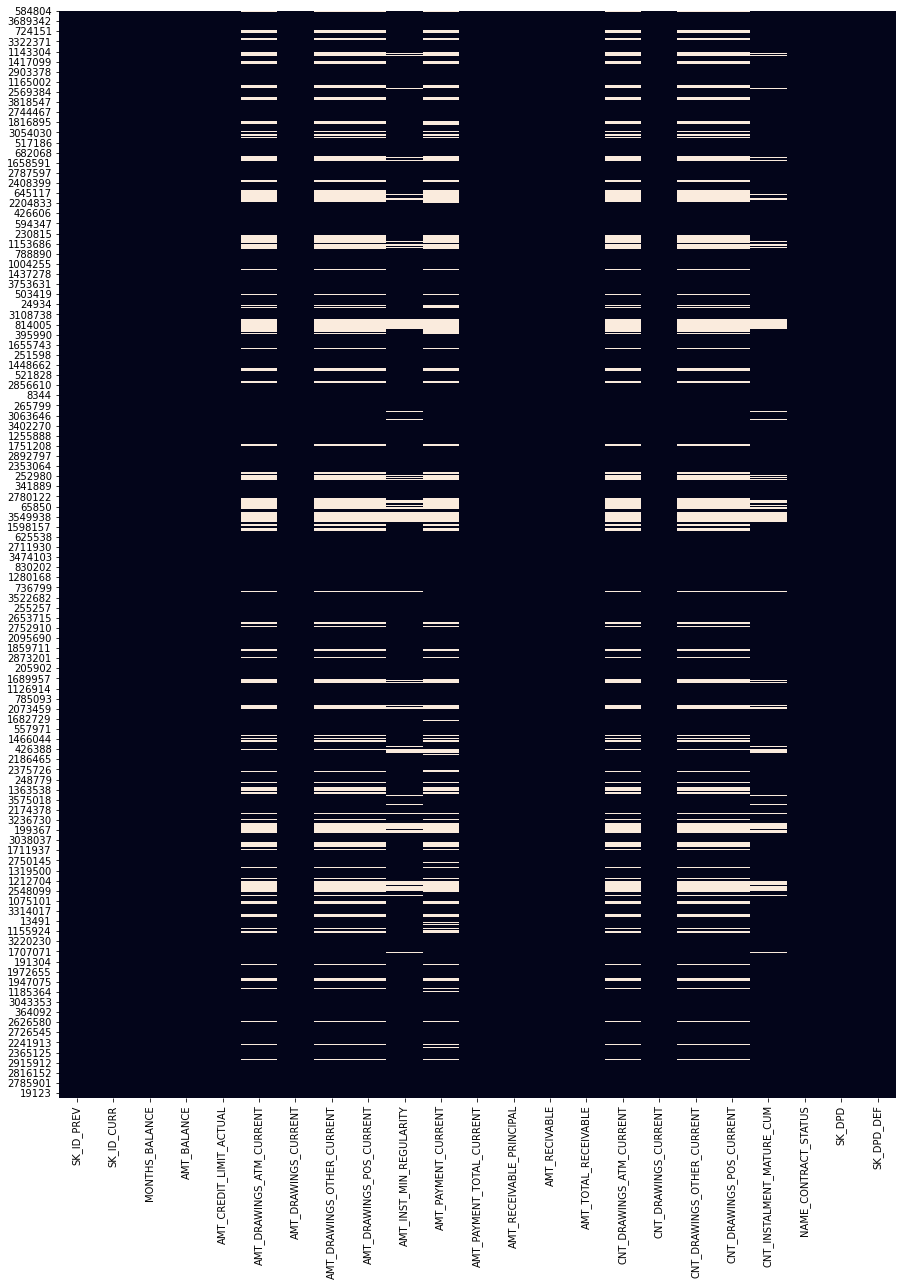

In [15]:
plt.subplots(figsize=(15,20))
sns.heatmap(df_credit_card_balance.isnull(),cbar=False);

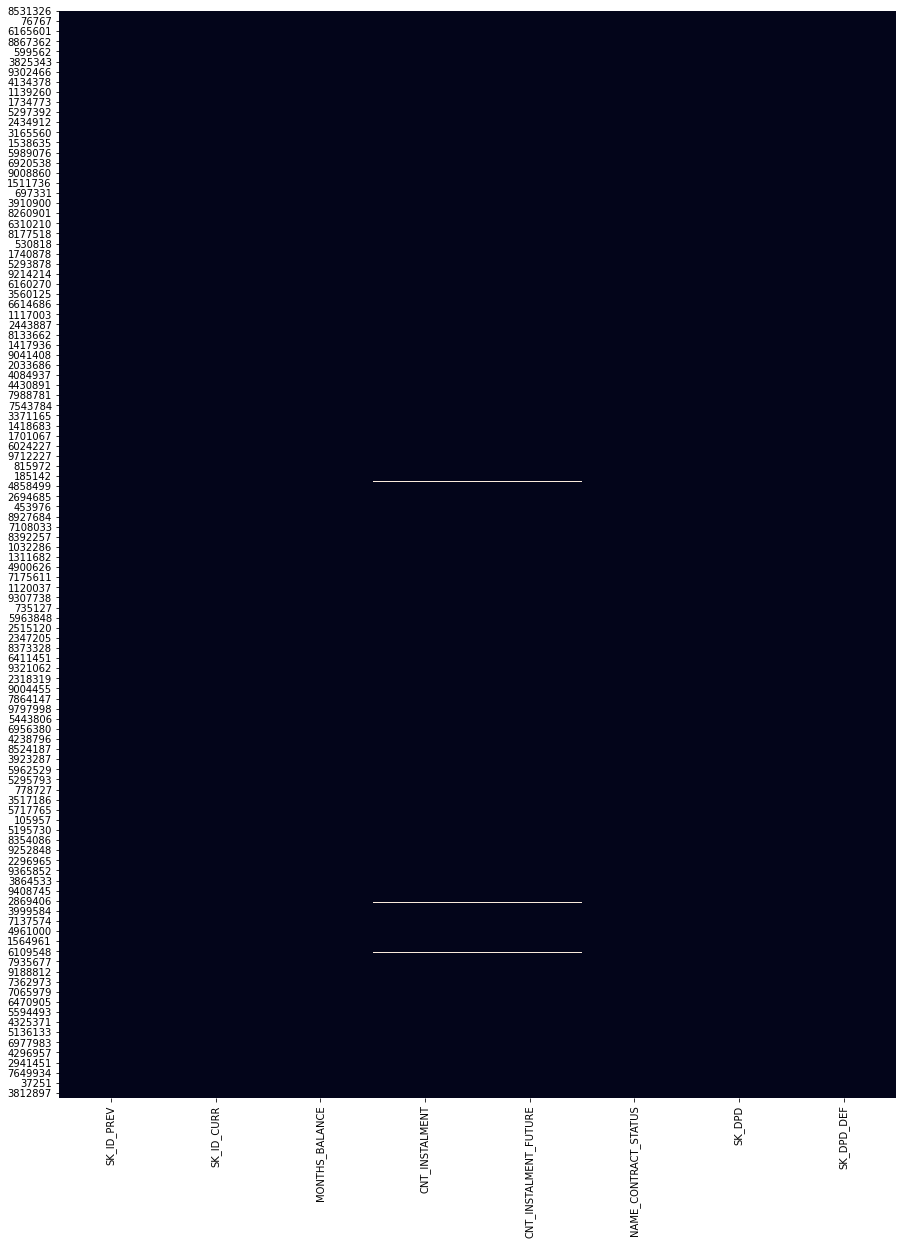

In [16]:
plt.subplots(figsize=(15,20))
sns.heatmap(df_POS_CASH_balance.isnull(),cbar=False);

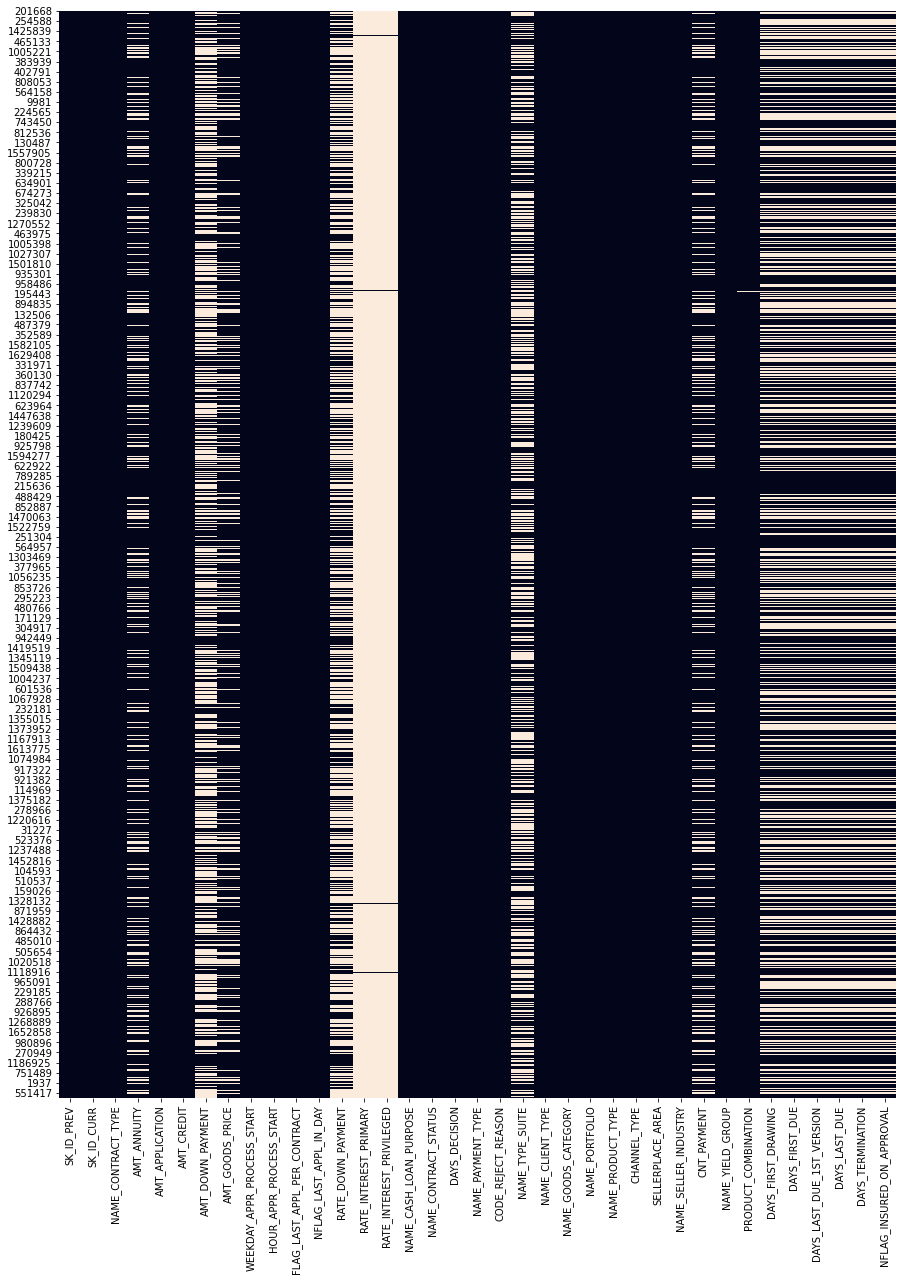

In [17]:
plt.subplots(figsize=(15,20))
sns.heatmap(df_previous_application.isnull(),cbar=False);

# Drop Cols from Tables with Majority Missing Data

## application_train

In [18]:
df_app_train_missing_vals = pd.DataFrame((df_app_train.isnull().sum()/df_app_train.shape[0]).sort_values(ascending=False).head(60)).reset_index().rename(columns={"index":"feature", 0:"percent_missing"})
df_app_train_missing_vals

,feature,percent_missing
0,COMMONAREA_MODE,0.6979
1,COMMONAREA_AVG,0.6979
2,COMMONAREA_MEDI,0.6979
3,NONLIVINGAPARTMENTS_MODE,0.6942
4,NONLIVINGAPARTMENTS_AVG,0.6942
5,NONLIVINGAPARTMENTS_MEDI,0.6942
6,FONDKAPREMONT_MODE,0.6857
7,LIVINGAPARTMENTS_AVG,0.6845
8,LIVINGAPARTMENTS_MODE,0.6845
9,LIVINGAPARTMENTS_MEDI,0.6845


In [57]:
# "FLAG_MOBIL"      -> 99.999% of all loans include a mobile #. No value added, drop.
# "FLAG_WORK_PHONE" -> Decription and col header don't match. Drop col.

drop_cols = list(df_app_train_missing_vals[df_app_train_missing_vals.percent_missing > 0.3].feature.values)+["FLAG_MOBIL", "FLAG_WORK_PHONE"]
df_app_train2 = df_app_train.drop(columns=drop_cols)
df_app_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 70 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   10000 non-null  int64  
 1   TARGET                       10000 non-null  int64  
 2   NAME_CONTRACT_TYPE           10000 non-null  object 
 3   CODE_GENDER                  10000 non-null  object 
 4   FLAG_OWN_CAR                 10000 non-null  object 
 5   FLAG_OWN_REALTY              10000 non-null  object 
 6   CNT_CHILDREN                 10000 non-null  int64  
 7   AMT_INCOME_TOTAL             10000 non-null  float64
 8   AMT_CREDIT                   10000 non-null  float64
 9   AMT_ANNUITY                  10000 non-null  float64
 10  AMT_GOODS_PRICE              9993 non-null   float64
 11  NAME_TYPE_SUITE              9959 non-null   object 
 12  NAME_INCOME_TYPE             10000 non-null  object 
 13  NAME_EDUCATION_TY

## bureau

In [40]:
df_bureau_missing_vals = pd.DataFrame((df_bureau.isnull().sum()/df_bureau.shape[0]).sort_values(ascending=False).head(60)).reset_index().rename(columns={"index":"feature", 0:"percent_missing"})
df_bureau_missing_vals

,feature,percent_missing
0,AMT_ANNUITY,0.7043
1,AMT_CREDIT_MAX_OVERDUE,0.6454
2,DAYS_ENDDATE_FACT,0.3788
3,AMT_CREDIT_SUM_LIMIT,0.3419
4,AMT_CREDIT_SUM_DEBT,0.1509
5,DAYS_CREDIT_ENDDATE,0.0654
6,CREDIT_ACTIVE,0.0000
7,CREDIT_CURRENCY,0.0000
8,DAYS_CREDIT,0.0000
9,CREDIT_DAY_OVERDUE,0.0000


In [41]:
drop_cols = df_bureau_missing_vals[df_bureau_missing_vals.percent_missing > 0.3].feature.values
df_bureau2 = df_bureau.drop(columns=drop_cols)
df_bureau2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 248487 to 854697
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SK_ID_CURR              10000 non-null  int64  
 1   SK_ID_BUREAU            10000 non-null  int64  
 2   CREDIT_ACTIVE           10000 non-null  object 
 3   CREDIT_CURRENCY         10000 non-null  object 
 4   DAYS_CREDIT             10000 non-null  int64  
 5   CREDIT_DAY_OVERDUE      10000 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     9346 non-null   float64
 7   CNT_CREDIT_PROLONG      10000 non-null  int64  
 8   AMT_CREDIT_SUM          10000 non-null  float64
 9   AMT_CREDIT_SUM_DEBT     8491 non-null   float64
 10  AMT_CREDIT_SUM_OVERDUE  10000 non-null  float64
 11  CREDIT_TYPE             10000 non-null  object 
 12  DAYS_CREDIT_UPDATE      10000 non-null  int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 1.1+ MB


## bureau_balance

In [42]:
df_bureau_balance_missing_vals = pd.DataFrame((df_bureau_balance.isnull().sum()/df_bureau_balance.shape[0]).sort_values(ascending=False).head(60)).reset_index().rename(columns={"index":"feature", 0:"percent_missing"})
df_bureau_balance_missing_vals

,feature,percent_missing
0,SK_ID_BUREAU,0.0
1,MONTHS_BALANCE,0.0
2,STATUS,0.0


In [43]:
drop_cols = df_bureau_balance_missing_vals[df_bureau_balance_missing_vals.percent_missing > 0.3].feature.values
df_bureau_balance2 = df_bureau_balance.drop(columns=drop_cols)
df_bureau_balance2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 26079760 to 26709355
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SK_ID_BUREAU    10000 non-null  int64 
 1   MONTHS_BALANCE  10000 non-null  int64 
 2   STATUS          10000 non-null  object
dtypes: int64(2), object(1)
memory usage: 312.5+ KB


## credit_card_balance

In [44]:
df_credit_card_balance_missing_vals = pd.DataFrame((df_credit_card_balance.isnull().sum()/df_credit_card_balance.shape[0]).sort_values(ascending=False).head(60)).reset_index().rename(columns={"index":"feature", 0:"percent_missing"})
df_credit_card_balance_missing_vals

,feature,percent_missing
0,AMT_PAYMENT_CURRENT,0.1895
1,AMT_DRAWINGS_ATM_CURRENT,0.1807
2,CNT_DRAWINGS_POS_CURRENT,0.1807
3,AMT_DRAWINGS_OTHER_CURRENT,0.1807
4,AMT_DRAWINGS_POS_CURRENT,0.1807
5,CNT_DRAWINGS_OTHER_CURRENT,0.1807
6,CNT_DRAWINGS_ATM_CURRENT,0.1807
7,CNT_INSTALMENT_MATURE_CUM,0.0720
8,AMT_INST_MIN_REGULARITY,0.0720
9,SK_ID_PREV,0.0000


In [45]:
drop_cols = df_credit_card_balance_missing_vals[df_credit_card_balance_missing_vals.percent_missing > 0.3].feature.values
df_credit_card_balance2 = df_credit_card_balance.drop(columns=drop_cols)
df_credit_card_balance2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 584804 to 440526
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_PREV                  10000 non-null  int64  
 1   SK_ID_CURR                  10000 non-null  int64  
 2   MONTHS_BALANCE              10000 non-null  int64  
 3   AMT_BALANCE                 10000 non-null  float64
 4   AMT_CREDIT_LIMIT_ACTUAL     10000 non-null  int64  
 5   AMT_DRAWINGS_ATM_CURRENT    8193 non-null   float64
 6   AMT_DRAWINGS_CURRENT        10000 non-null  float64
 7   AMT_DRAWINGS_OTHER_CURRENT  8193 non-null   float64
 8   AMT_DRAWINGS_POS_CURRENT    8193 non-null   float64
 9   AMT_INST_MIN_REGULARITY     9280 non-null   float64
 10  AMT_PAYMENT_CURRENT         8105 non-null   float64
 11  AMT_PAYMENT_TOTAL_CURRENT   10000 non-null  float64
 12  AMT_RECEIVABLE_PRINCIPAL    10000 non-null  float64
 13  AMT_RECIVABLE            

## POS_CASH_balance

In [47]:
df_POS_CASH_balance_missing_vals = pd.DataFrame((df_POS_CASH_balance.isnull().sum()/df_POS_CASH_balance.shape[0]).sort_values(ascending=False).head(60)).reset_index().rename(columns={"index":"feature", 0:"percent_missing"})
df_POS_CASH_balance_missing_vals

,feature,percent_missing
0,CNT_INSTALMENT,0.0038
1,CNT_INSTALMENT_FUTURE,0.0038
2,SK_ID_PREV,0.0000
3,SK_ID_CURR,0.0000
4,MONTHS_BALANCE,0.0000
5,NAME_CONTRACT_STATUS,0.0000
6,SK_DPD,0.0000
7,SK_DPD_DEF,0.0000


In [50]:
drop_cols = df_POS_CASH_balance_missing_vals[df_POS_CASH_balance_missing_vals.percent_missing > 0.3].feature.values
df_POS_CASH_balance2 = df_POS_CASH_balance.drop(columns=drop_cols)
df_POS_CASH_balance2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 8531326 to 574649
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SK_ID_PREV             10000 non-null  int64  
 1   SK_ID_CURR             10000 non-null  int64  
 2   MONTHS_BALANCE         10000 non-null  int64  
 3   CNT_INSTALMENT         9962 non-null   float64
 4   CNT_INSTALMENT_FUTURE  9962 non-null   float64
 5   NAME_CONTRACT_STATUS   10000 non-null  object 
 6   SK_DPD                 10000 non-null  int64  
 7   SK_DPD_DEF             10000 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 703.1+ KB


## previous_application

In [51]:
df_previous_application_missing_vals = pd.DataFrame((df_previous_application.isnull().sum()/df_previous_application.shape[0]).sort_values(ascending=False).head(60)).reset_index().rename(columns={"index":"feature", 0:"percent_missing"})
df_previous_application_missing_vals

,feature,percent_missing
0,RATE_INTEREST_PRIVILEGED,0.9967
1,RATE_INTEREST_PRIMARY,0.9967
2,RATE_DOWN_PAYMENT,0.5449
3,AMT_DOWN_PAYMENT,0.5449
4,NAME_TYPE_SUITE,0.4913
5,NFLAG_INSURED_ON_APPROVAL,0.4142
6,DAYS_FIRST_DRAWING,0.4142
7,DAYS_FIRST_DUE,0.4142
8,DAYS_LAST_DUE_1ST_VERSION,0.4142
9,DAYS_LAST_DUE,0.4142


In [52]:
drop_cols = df_previous_application_missing_vals[df_previous_application_missing_vals.percent_missing > 0.3].feature.values
df_previous_application2 = df_previous_application.drop(columns=drop_cols)
df_previous_application2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 201668 to 1549247
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   10000 non-null  int64  
 1   SK_ID_CURR                   10000 non-null  int64  
 2   NAME_CONTRACT_TYPE           10000 non-null  object 
 3   AMT_ANNUITY                  7656 non-null   float64
 4   AMT_APPLICATION              10000 non-null  float64
 5   AMT_CREDIT                   10000 non-null  float64
 6   AMT_GOODS_PRICE              7637 non-null   float64
 7   WEEKDAY_APPR_PROCESS_START   10000 non-null  object 
 8   HOUR_APPR_PROCESS_START      10000 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  10000 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       10000 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       10000 non-null  object 
 12  NAME_CONTRACT_STATUS         10000 non-null  object 
 13  DAYS_DECI

In [72]:
df_previous_application2[df_previous_application2["SK_ID_CURR"] == 100003]
# df_previous_application2

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
575941,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
1021650,2636178,100003,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
1223745,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest


# Aggregation Strategies 

## application_train

In [67]:
pd.read_json(df_app_train2.info)

ValueError: Invalid file path or buffer object type: <class 'method'>

## bureau

## bureau_balance

## credit_card_balance

In [109]:
df_credit_card_balance2.head(60)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
584804,1489396,100006,-1,0.000,270000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
1399895,1489396,100006,-4,0.000,270000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
520387,1489396,100006,-2,0.000,270000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
1636141,1489396,100006,-6,0.000,270000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
655566,1489396,100006,-5,0.000,270000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
1347528,1489396,100006,-3,0.000,270000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
2771280,1843384,100011,-37,0.000,180000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,33.0,Active,0,0
3201936,1843384,100011,-31,0.000,180000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,33.0,Active,0,0
131693,1843384,100011,-6,0.000,90000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,33.0,Active,0,0
1189825,1843384,100011,-70,170289.720,180000,0.0,0.0,0.0,0.0,9000.000,...,170289.720,170289.720,0.0,0,0.0,0.0,5.0,Active,0,0


All columns:

In [104]:
df_credit_card_balance2.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

Months Balance >=3

In [125]:
months = -3
df_credit_card_balance3 = df_credit_card_balance2[df_credit_card_balance2.MONTHS_BALANCE >= months]

In [132]:
# Feat eng credit utilization
df_credit_card_balance3['CREDIT_UTILIZATION'] = df_credit_card_balance3['AMT_BALANCE'] / df_credit_card_balance3['AMT_CREDIT_LIMIT_ACTUAL']

<ipython-input-132-3b2b9ae7d6e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_credit_card_balance3['CREDIT_UTILIZATION'] = df_credit_card_balance3['AMT_BALANCE'] / df_credit_card_balance3['AMT_CREDIT_LIMIT_ACTUAL']


<AxesSubplot:>

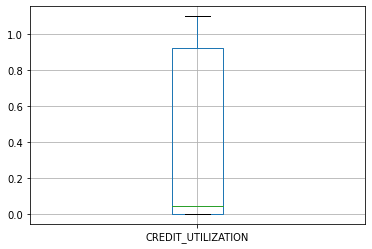

In [140]:
df_credit_card_balance3[['CREDIT_UTILIZATION']].boxplot()

In [143]:
df_credit_card_balance3.query("SK_ID_CURR == 100006")

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,CREDIT_UTILIZATION
584804,1489396,100006,-1,0.0,270000,NaN,0.0,NaN,NaN,0.0,...,0.0,NaN,0,NaN,NaN,0.0,Active,0,0,0.0
520387,1489396,100006,-2,0.0,270000,NaN,0.0,NaN,NaN,0.0,...,0.0,NaN,0,NaN,NaN,0.0,Active,0,0,0.0
1347528,1489396,100006,-3,0.0,270000,NaN,0.0,NaN,NaN,0.0,...,0.0,NaN,0,NaN,NaN,0.0,Active,0,0,0.0


In [ ]:
{'SK_ID_PREV'                : 'count',
'MONTHS_BALANCE'             : 'mean',
'AMT_BALANCE'                : 'median',
'AMT_CREDIT_LIMIT_ACTUAL'    : 'max',
'AMT_DRAWINGS_ATM_CURRENT'   : 'count',
'AMT_DRAWINGS_CURRENT'       : 'median',
'AMT_DRAWINGS_OTHER_CURRENT' : 'median',
'AMT_DRAWINGS_POS_CURRENT'   : 'median',
'AMT_INST_MIN_REGULARITY'    : 'median',
'AMT_PAYMENT_CURRENT'        : '',
'AMT_PAYMENT_TOTAL_CURRENT'  : '',
'AMT_RECEIVABLE_PRINCIPAL'   : '',
'AMT_RECIVABLE'              : '',
'AMT_TOTAL_RECEIVABLE'       : '',
'CNT_DRAWINGS_ATM_CURRENT'   : '',
'CNT_DRAWINGS_CURRENT'       : '',
'CNT_DRAWINGS_OTHER_CURRENT' : '',
'CNT_DRAWINGS_POS_CURRENT'   : '',
'CNT_INSTALMENT_MATURE_CUM'  : '',
'NAME_CONTRACT_STATUS'       : '',
'SK_DPD'                     : '',
'SK_DPD_DEF'                 : '',
'CREDIT_UTILIZATION'         : ['max','mean'], # Feat eng'd col
}

# agg={col : ['count', 'mean', 'min', 'max', "sum", "median", "nunique"] for col in df_xxxxxxxxxx.columns.values}

In [134]:
# Drop cat cols
df_credit_card_balance4 = df_credit_card_balance3.select_dtypes(exclude="object")

In [135]:
df_credit_card_balance4.groupby(by="SK_ID_CURR").agg(['count', 'mean', 'min', 'max', "sum", "nunique"])

SK_ID_PREV                                                \
                count       mean      min      max      sum nunique   
SK_ID_CURR                                                            
100006              3  1489396.0  1489396  1489396  4468188       1   
100011              2  1843384.0  1843384  1843384  3686768       1   
100013              3  2038692.0  2038692  2038692  6116076       1   
100021              2  2594025.0  2594025  2594025  5188050       1   
100028              3  1914954.0  1914954  1914954  5744862       1   
...               ...        ...      ...      ...      ...     ...   
100900              2  1772894.0  1772894  1772894  3545788       1   
100902              3  1331030.0  1331030  1331030  3993090       1   
100906              3  1682579.0  1682579  1682579  5047737       1   
100912              3  1559985.0  1559985  1559985  4679955       1   
100913              1  1851029.0  1851029  1851029  1851029       1   

           MONTHS_BALANCE               ... SK_DPD_DEF                  \
                    count mean min max  ...        min max sum nunique   
SK_ID_CURR                              ...                              
100006                  3 -2.0  -3  -1  ...          0   0   0       1   
100011                  2 -2.5  -3  -2  ...          0   0   0       1   
100013                  3 -2.0  -3  -1  ...          0   0   0       1   
100021                  2 -2.5  -3  -2  ...          0   0   0       1   
100028                  3 -2.0  -3  -1  ...          0   0   0       1   
...                   ...  ...  ..  ..  ...        ...  ..  ..     ...   
100900                  2 -2.5  -3  -2  ...          0   0   0       1   
100902                  3 -2.0  -3  -1  ...          0   0   0       1   
100906                  3 -2.0  -3  -1  ...          0   0   0       1   
100912                  3 -2.0  -3  -1  ...          0   0   0       1   
100913                  1 -2.0  -2  -2  ...          0   0   0       1   

           CREDIT_UTILIZATION                                                  
                        count      mean       min       max       sum nunique  
SK_ID_CURR                                                                     
100006                      3  0.000000  0.000000  0.000000  0.000000       1  
100011                      2  0.000000  0.000000  0.000000  0.000000       1  
100013                      3  0.000000  0.000000  0.000000  0.000000       1  
100021                      2  0.000000  0.000000  0.000000  0.000000       1  
100028                      3  0.121878  0.089875  0.165937  0.365635       3  
...                       ...       ...       ...       ...       ...     ...  
100900                      0       NaN       NaN       NaN  0.000000       0  
100902                      0       NaN       NaN       NaN  0.000000       0  
100906                      3  1.028272  1.023489  1.030674  3.084816       3  
100912                      3  0.677429  0.195018  0.941310  2.032287       3  
100913                      1  0.897687  0.897687  0.897687  0.897687       1  

[261 rows x 132 columns]

In [139]:
SK_ID_CURR = 100011
df_credit_card_balance4[df_credit_card_balance4.SK_ID_CURR==SK_ID_CURR].sort_values(by="SK_ID_PREV").head(60)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,CREDIT_UTILIZATION
2739019,1843384,100011,-2,0.0,90000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,33.0,0,0,0.0
3496910,1843384,100011,-3,0.0,90000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,33.0,0,0,0.0


## POS_CASH_balance

## previous_application

In [35]:
df_app_train2.SK_ID_CURR.nunique(), df_bureau2.SK_ID_CURR.nunique()

(10000, 1830)

In [37]:
df_merged = pd.merge(df_app_train2, df_bureau2, on="SK_ID_CURR", how="inner")
df_merged.head(60)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,currency 1,-103,0,NaN,0,31988.565,0.0,0.0,Credit card,-24
1,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,currency 1,-645,0,85.0,0,120735.000,0.0,0.0,Consumer credit,-34
2,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,currency 1,-1121,0,-911.0,0,19071.000,NaN,0.0,Consumer credit,-906
3,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,currency 1,-1437,0,-1072.0,0,135000.000,0.0,0.0,Consumer credit,-1185
4,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,currency 1,-476,0,NaN,0,0.000,0.0,0.0,Credit card,-47
5,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,currency 1,-1125,0,-1038.0,0,40761.000,NaN,0.0,Credit card,-1038
6,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,currency 1,-1042,0,780.0,0,450000.000,245781.0,0.0,Consumer credit,-7
7,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,currency 1,-1043,0,62.0,0,67500.000,NaN,0.0,Credit card,-758
8,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,currency 1,-606,0,1216.0,0,810000.000,0.0,0.0,Credit card,-43
9,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,currency 1,-775,0,-420.0,0,72652.500,0.0,0.0,Consumer credit,-550


In [25]:
df_merged.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY_x',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_

In [38]:
df_merged.SK_ID_CURR.nunique()

1558

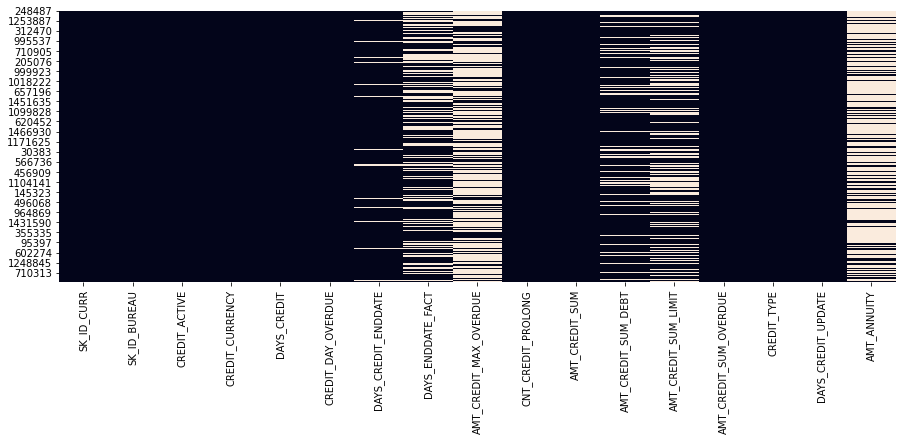

In [27]:
plt.subplots(figsize=(15,5))
sns.heatmap(df_bureau.isnull(),cbar=False);

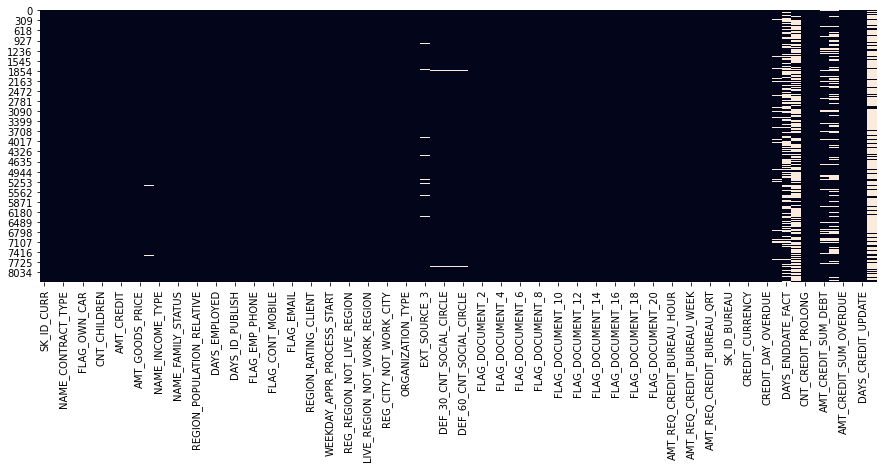

In [28]:
plt.subplots(figsize=(15,5))
sns.heatmap(df_merged.isnull(),cbar=False);

# Pipeline